# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Social Media Engagement Dataset](https://www.kaggle.com/datasets/cagrickr/social-media-post-engagement-dataset/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/kaggle/input/social-media-post-engagement-dataset/social_media_engagement_dataset.json
/kaggle/input/social-media-post-engagement-dataset/social_media_engagement_dataset.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('social_media_engagement_dataset.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,platform,post_type,post_length,views,likes,comments,shares,engagement_rate
0,Facebook,Text,62,91660,2968,276,346,0.039166
1,Instagram,Video,104,113115,4164,632,406,0.045989
2,Facebook,Video,46,36043,3125,188,100,0.094692
3,Facebook,Image,39,124886,5970,948,578,0.060023
4,Instagram,Video,42,82831,8212,1104,334,0.116502


## last Five row

In [4]:
df.tail()

,platform,post_type,post_length,views,likes,comments,shares,engagement_rate
9995,Facebook,Image,65,42330,1436,158,122,0.040539
9996,Instagram,Text,119,254309,12274,2226,1089,0.061299
9997,Twitter,Image,17,48415,4126,503,581,0.107611
9998,Twitter,Video,16,63006,5504,529,499,0.103673
9999,Facebook,Image,33,183199,17318,1292,971,0.106884


## Shape of our dataset

In [5]:
df.shape

(10000, 8)

## List out all columns

In [6]:
df.columns

Index(['platform', 'post_type', 'post_length', 'views', 'likes', 'comments',
       'shares', 'engagement_rate'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

platform            object
post_type           object
post_length          int64
views                int64
likes                int64
comments             int64
shares               int64
engagement_rate    float64
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         10000 non-null  object 
 1   post_type        10000 non-null  object 
 2   post_length      10000 non-null  int64  
 3   views            10000 non-null  int64  
 4   likes            10000 non-null  int64  
 5   comments         10000 non-null  int64  
 6   shares           10000 non-null  int64  
 7   engagement_rate  10000 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 625.1+ KB


## Check Null Value

In [9]:
df.isnull().sum()

platform           0
post_type          0
post_length        0
views              0
likes              0
comments           0
shares             0
engagement_rate    0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

0

## Summary

In [11]:
df.describe()

,post_length,views,likes,comments,shares,engagement_rate
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,62.359800,127151.950600,7033.26920,879.232800,602.262700,0.066696
std,33.264888,75169.927932,5673.59828,812.409438,597.573391,0.031598
min,5.000000,2059.000000,35.00000,3.000000,2.000000,0.011227
25%,34.000000,65211.000000,2513.75000,275.000000,170.000000,0.039637
50%,62.000000,122402.500000,5580.50000,635.000000,406.000000,0.066719
75%,91.000000,184217.000000,10276.50000,1228.000000,837.000000,0.093694
max,119.000000,299997.000000,29486.00000,5435.000000,3861.000000,0.132124


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

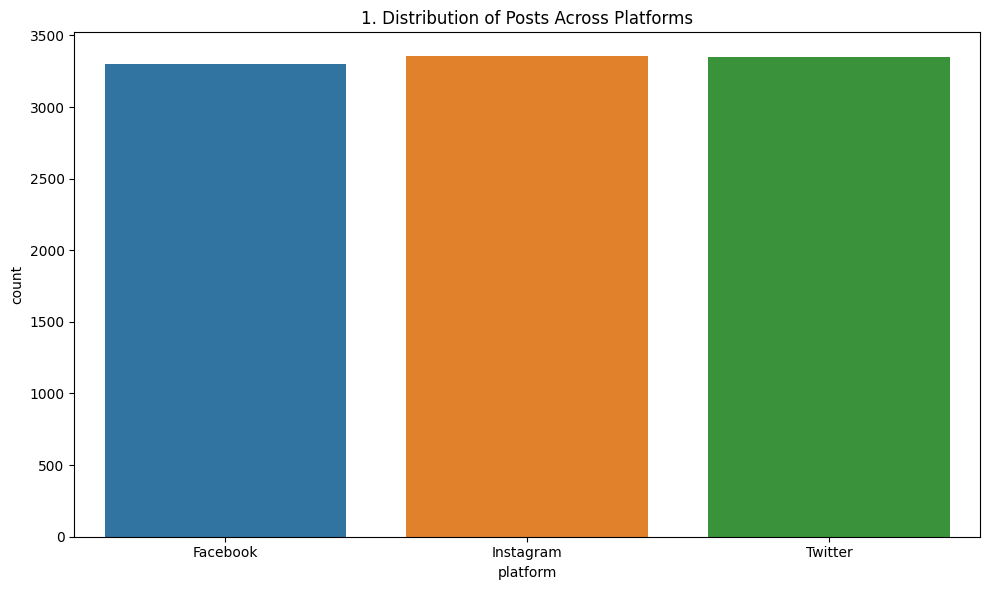

In [13]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="platform")
plt.title(f'{plot_no}. Distribution of Posts Across Platforms')
show_fig()
plot_no += 1

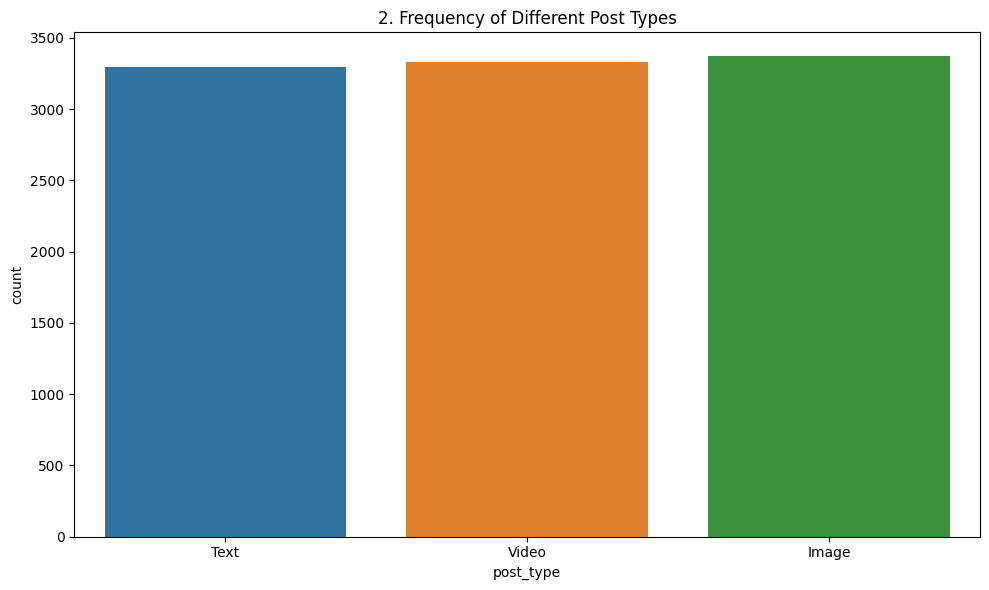

In [14]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="post_type")
plt.title(f'{plot_no}. Frequency of Different Post Types')
show_fig()
plot_no += 1


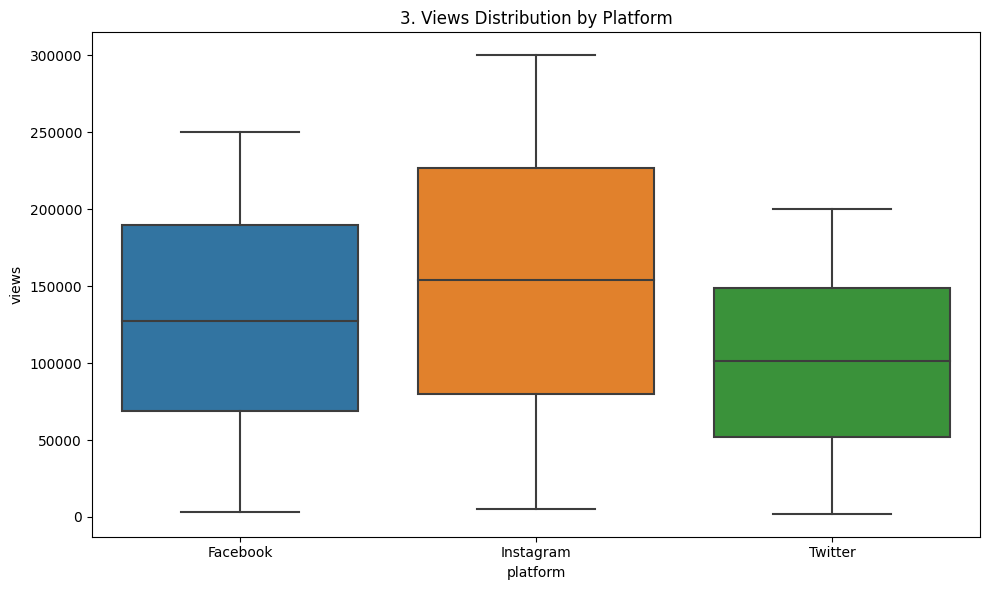

In [15]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="platform", y="views")
plt.title(f'{plot_no}. Views Distribution by Platform')
show_fig()
plot_no += 1


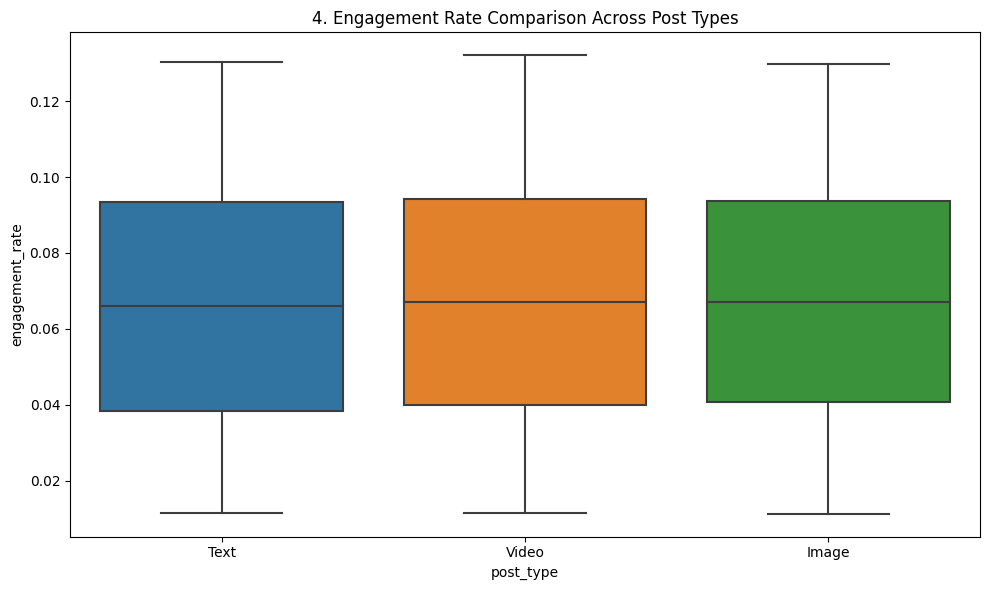

In [16]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="post_type", y="engagement_rate")
plt.title(f'{plot_no}. Engagement Rate Comparison Across Post Types')
show_fig()
plot_no += 1


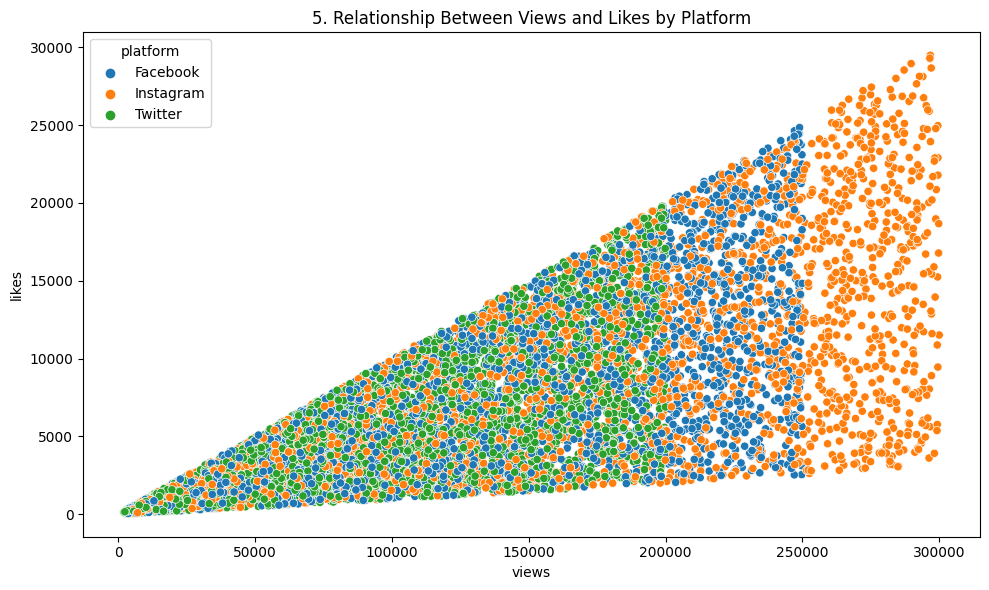

In [17]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="views", y="likes", hue="platform")
plt.title(f'{plot_no}. Relationship Between Views and Likes by Platform')
show_fig()
plot_no += 1


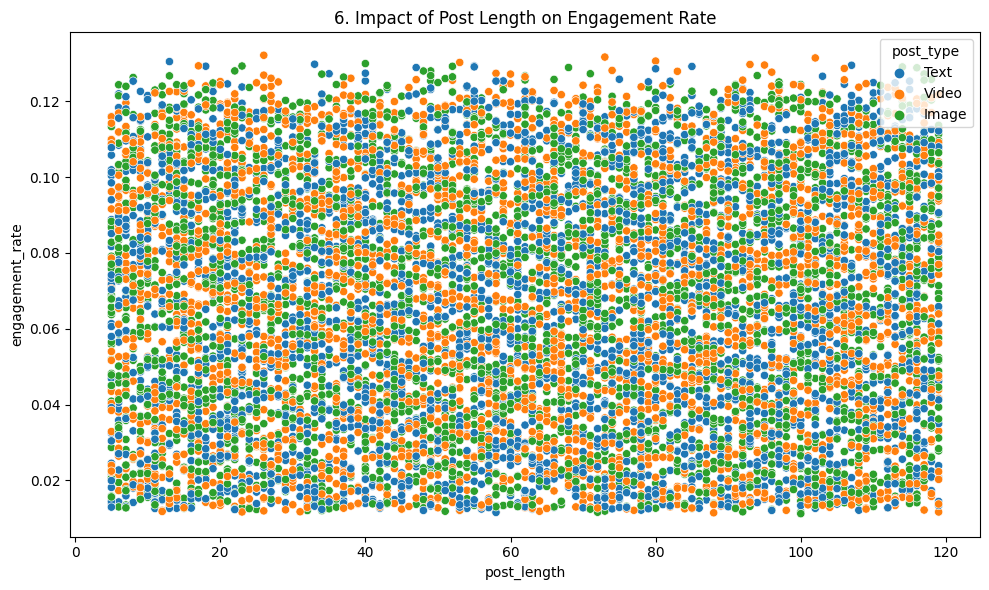

In [18]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="post_length", y="engagement_rate", hue="post_type")
plt.title(f'{plot_no}. Impact of Post Length on Engagement Rate')
show_fig()
plot_no += 1


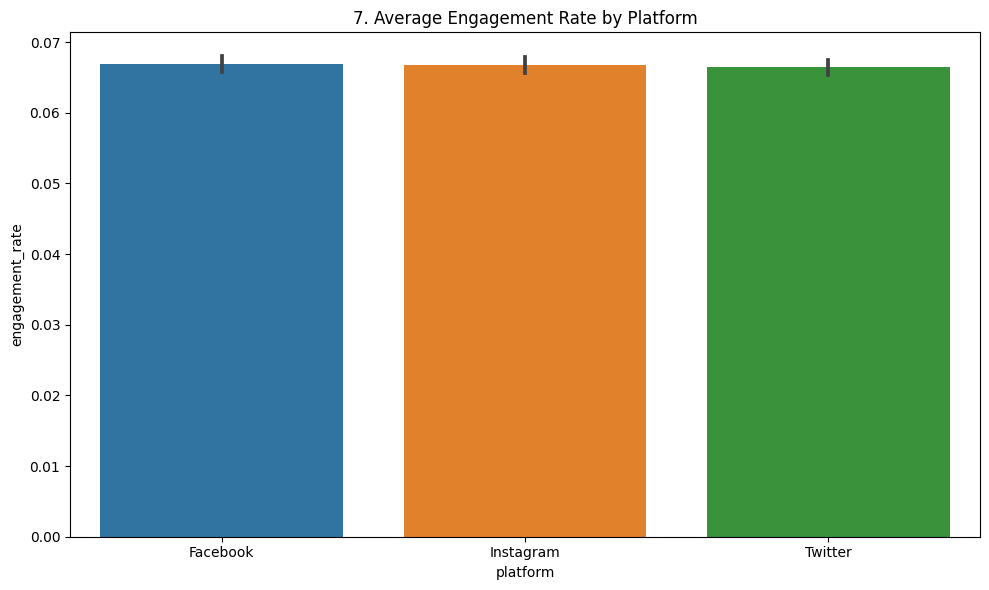

In [19]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x="platform", y="engagement_rate", estimator="mean")
plt.title(f'{plot_no}. Average Engagement Rate by Platform')
show_fig()
plot_no += 1


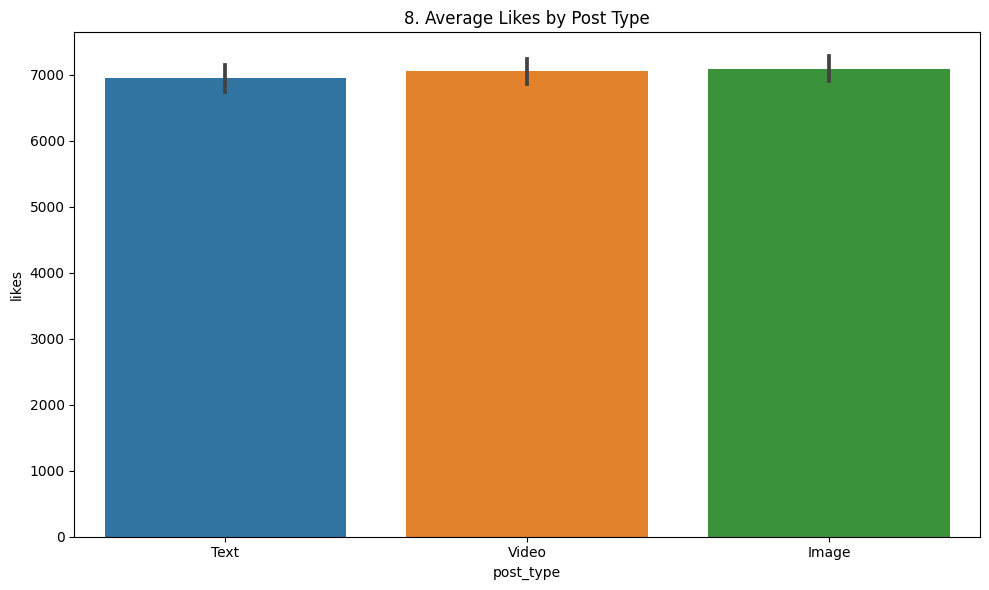

In [20]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x="post_type", y="likes", estimator="mean")
plt.title(f'{plot_no}. Average Likes by Post Type')
show_fig()
plot_no += 1


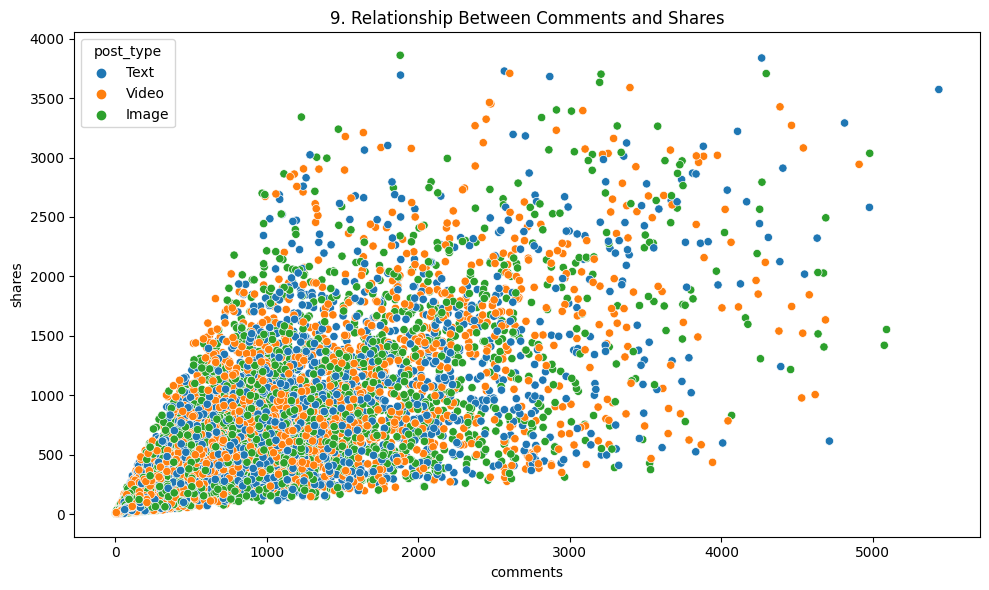

In [21]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="comments", y="shares", hue="post_type")
plt.title(f'{plot_no}. Relationship Between Comments and Shares')
show_fig()
plot_no += 1


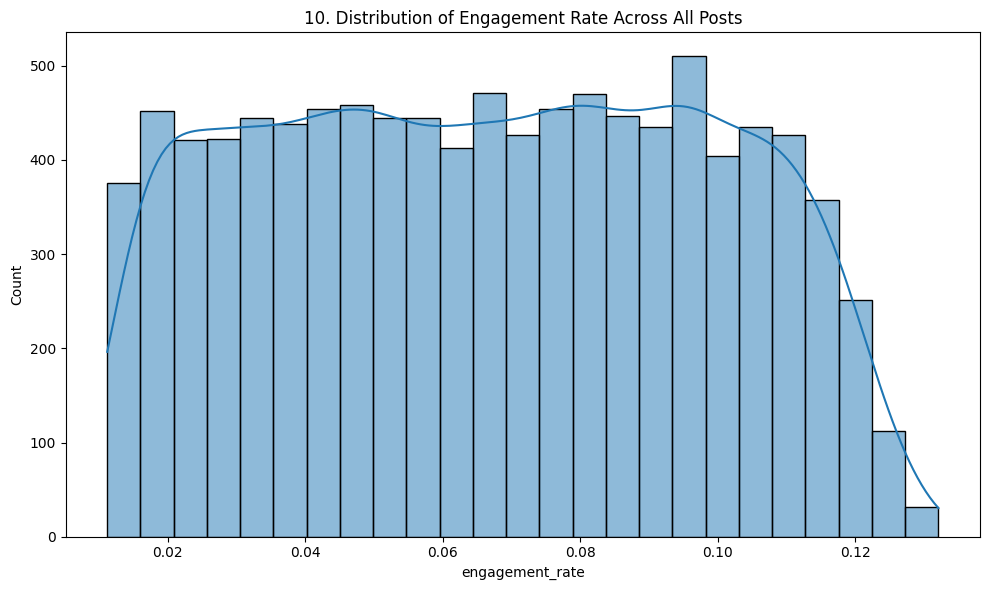

In [22]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df, x="engagement_rate", kde=True)
plt.title(f'{plot_no}. Distribution of Engagement Rate Across All Posts')
show_fig()
plot_no += 1


# Model Training

## select features and target

In [23]:
X = df[['post_length', 'views', 'likes', 'comments', 'shares']]
y = df['engagement_rate']

## train-test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## scale features

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## initialize model

In [26]:
model = LinearRegression()

## train model

In [27]:
model.fit(X_train_scaled, y_train)

LinearRegression()

## predictions

In [28]:
y_pred = model.predict(X_test_scaled)

## evaluation metrics

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

## print results

In [30]:
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.00027993607864014425
R2 Score: 0.7236296623339828


## actual vs predicted plot

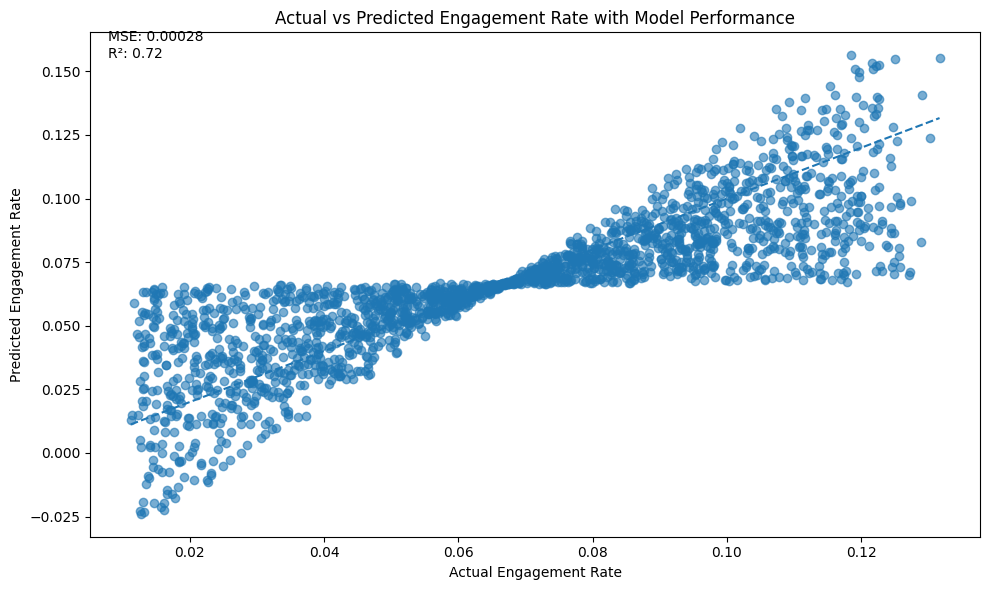

In [31]:
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.text(0.02, 0.95,
         f"MSE: {mse:.5f}\nR²: {r2:.2f}",
         transform=plt.gca().transAxes)
plt.xlabel("Actual Engagement Rate")
plt.ylabel("Predicted Engagement Rate")
plt.title("Actual vs Predicted Engagement Rate with Model Performance")
show_fig()